# Stage 2

- has **`location_raw`**: False
- vars one-hot encoded: True
- var label-encoded: False
- oversampled: False

In [1]:
import pickle

import humanize
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.externals.joblib import parallel_backend
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split


%matplotlib inline
%load_ext autoreload

In [2]:
X_train = pickle.load(open('./data/stage2-train.pkl', 'rb'))
y_train = X_train.pop('stop_outcome')
X_test = pickle.load(open('./data/stage2-test.pkl', 'rb'))
y_test = X_test.pop('stop_outcome')

print('Row counts:\n\ttrain: {}\n\ttest: {}'.format(X_train.shape[0], X_test.shape[0]))


Row counts:
	train: 250134
	test: 62534


# Classifiers

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


class Classifier(object):
    def __init__(self, classifier):
        self.clf = classifier
        self.fitted = False
        self.name = self.get_name(self.clf)
        self.score_val = 0.0

    def get_name(self, classifier):
        return str(classifier.__class__).split('.')[-1].replace("'>", "")
        
    def fit(self, X_train, y_train):
        self.clf.fit(X_train, y_train)
        self.fitted = True

    def score(self, X_train, y_train):
        if self.fitted:
            print('Scoring...')
            self.score_val = self.clf.score(X_train, y_train)
            print(self.score_val)
        else:
            print('Please run the .fit() method first')

        
clf = {
    'sgd': Classifier(SGDClassifier()),
    'gnb': Classifier(GaussianNB()),
    'dtc': Classifier(DecisionTreeClassifier(random_state=0)),
    'rfc': Classifier(RandomForestClassifier(n_jobs=8, verbose=3, random_state=0)),
    'gbc': Classifier(GradientBoostingClassifier(random_state=0)),
    'gbc_tuned': Classifier(GradientBoostingClassifier(
    #     learning_rate=0.0983,
        max_depth=6,
    #     max_features=len(list(X_train.columns.values)),
        subsample=0.9,
        verbose=3,
        random_state=0,
    )),
}
        
    

In [4]:
# Split the 'features' and 'labels' data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features,
#                                                     labels, 
#                                                     test_size=0.2, 
#                                                     random_state=0)
# final_test_features = pickle.load(open('./data/final_test_set.pkl', 'rb'))
# final_test_outcomes = final_test_features.pop('stop_outcome')
# print('Final test set row count: {}'.format(final_test_features.shape[0]))

# X_train = features
# y_train = labels
# X_test = final_test_features
# y_test = final_test_outcomes

# Benchmark

In [5]:
# LabelEncoded value for "Ticket" outcome is 2
predictions = [2]
accuracy_score(y_test, predictions * y_test.shape[0])

0.69127194806025527

# Simple Linear Classifier

In [6]:
clf['sgd'].fit(X_train, y_train)
clf['sgd'].score(X_test, y_test)

/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Scoring...
0.707311222695


# GaussianNB

In [7]:
clf['gnb'].fit(X_train, y_train)
clf['gnb'].score(X_test, y_test)

Scoring...
0.202977580196


# DecisionTreeClassifier

In [8]:
clf['dtc'].fit(X_train, y_train)
clf['dtc'].score(X_test, y_test)

Scoring...
0.571481114274


# RandomForestClassifier

In [9]:
# rfc = RandomForestClassifier(n_jobs=8, verbose=3, random_state=0)
clf['rfc'].fit(X_train, y_train)
clf['rfc'].score(X_test, y_test)

building tree 3 of 10
building tree 4 of 10building tree 6 of 10building tree 7 of 10building tree 5 of 10building tree 2 of 10building tree 8 of 10





building tree 1 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    1.6s remaining:    3.6s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    1.7s remaining:    0.7s


Scoring...
0.701890171747


[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.1s finished


# GradientBoostingClassifier

In [10]:
# gbc = GradientBoostingClassifier(random_state=0)
clf['gbc'].fit(X_train, y_train)
clf['gbc'].score(X_test, y_test)

Scoring...
0.724262001471


## GradientBoostingClassifier (Tuned)


In [11]:
# gbc_tuned = GradientBoostingClassifier(
# #     learning_rate=0.0983,
#     max_depth=6,
# #     max_features=len(list(X_train.columns.values)),
#     subsample=0.9,
#     verbose=3,
#     random_state=0,
# )
clf['gbc_tuned'].fit(X_train, y_train)
clf['gbc_tuned'].score(X_test, y_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1      274740.5124        2518.9828           20.04m
         2      257074.6021        1949.1762           19.83m
         3      243035.6809        1540.0856           19.55m
         4      231658.9956        1224.6895           19.81m
         5      222726.1554        1014.0105           19.88m
         6      215057.5242         820.0768           19.79m
         7      208838.9299         680.8242           19.43m
         8      203769.7330         574.0885           19.39m
         9      199152.5644         482.2216           19.30m
        10      195288.7574         410.1782           19.21m
        11      191987.5855         341.0290           18.94m
        12      189227.2436         291.7752           18.87m
        13      187019.4845         262.4702           18.69m
        14      184598.3057         209.9213           18.61m
        15      182732.4329         191.8864           18.51m
       

### Confusion Matrix

In [12]:
headers = ['Arrest', 'Summons', 'Ticket', 'Verbal Warning', 'Written Warning']
cm = pd.DataFrame(data=confusion_matrix(y_test, clf['gbc_tuned'].clf.predict(X_test)), columns=headers, index=headers)
cm

,Arrest,Summons,Ticket,Verbal Warning,Written Warning
Arrest,521,133,697,50,7
Summons,162,745,1653,73,24
Ticket,275,249,41026,1240,438
Verbal Warning,25,36,6038,2412,232
Written Warning,26,22,4371,1227,852


In [13]:
precision_recall_fscore_support(y_test, clf['gbc_tuned'].clf.predict(X_test), average=None)

(array([ 0.51635282,  0.62869198,  0.76277773,  0.48220712,  0.54861558]),
 array([ 0.37002841,  0.28039142,  0.94906079,  0.27587785,  0.13111727]),
 array([ 0.43111295,  0.38781884,  0.84578355,  0.35096399,  0.21165073]),
 array([ 1408,  2657, 43228,  8743,  6498]))

In [14]:
precision_recall_fscore_support(y_test, clf['gbc_tuned'].clf.predict(X_test), average='micro')

(0.72849969616528609, 0.72849969616528609, 0.72849969616528609, None)

In [15]:
precision_recall_fscore_support(y_test, clf['gbc_tuned'].clf.predict(X_test), average='macro')

(0.58772904674583837, 0.4012951467797693, 0.44546601251865947, None)

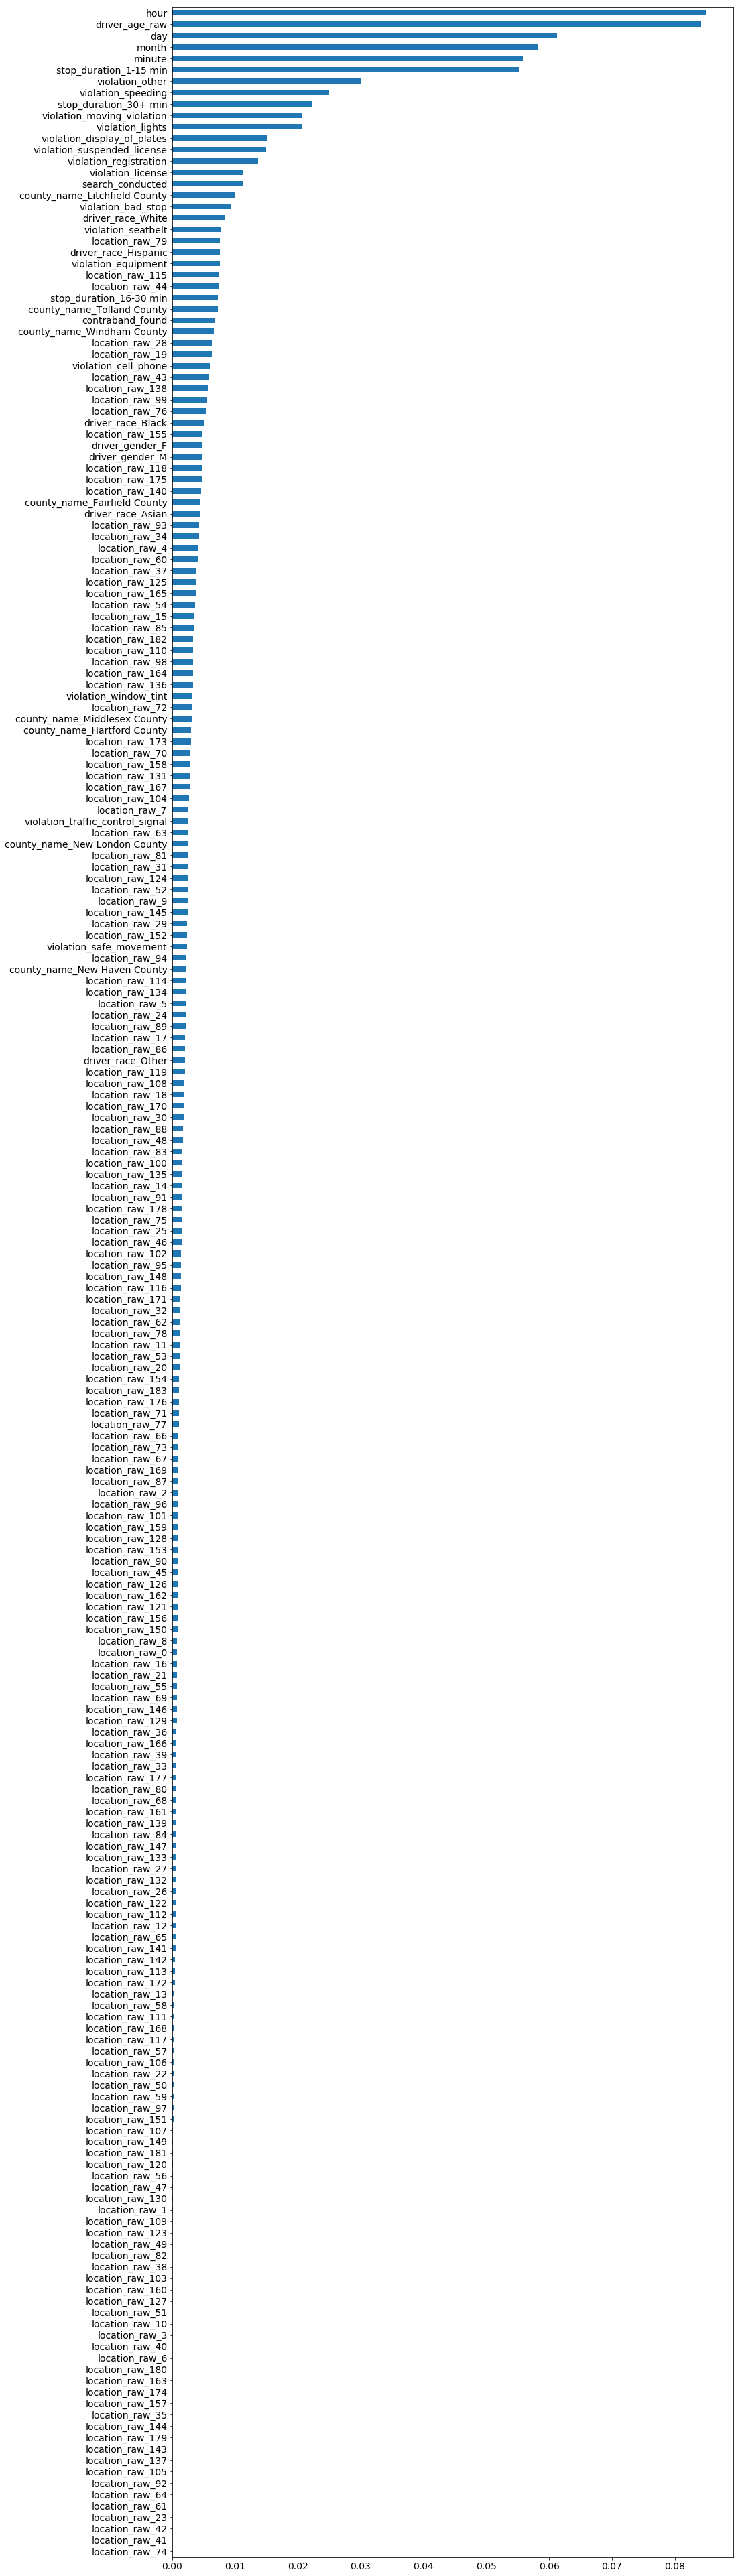

In [23]:
gbc_tuned_df = pd.DataFrame(data=clf['gbc_tuned'].clf.feature_importances_, index=X_train.columns.values)
gbc_tuned_plot = gbc_tuned_df.sort_values(by=0).plot.barh(figsize=(15, 70), fontsize=14)
gbc_tuned_plot.axes.legend().set_visible(False)

In [17]:
keys = clf.keys()
scores = [clf[key].score_val for key in keys]
results = pd.Series(scores, index=keys)
results

sgd          0.707311
gnb          0.202978
dtc          0.571481
rfc          0.701890
gbc          0.724262
gbc_tuned    0.728500
dtype: float64

In [18]:
X_train.columns.values.shape

(224,)